In [1]:
import sys

!{sys.executable} --version

Python 3.12.8


NOTE: Use `Shift+Tab` to show contextual tab.

https://github.com/DeepReinforcementLearning/DeepReinforcementLearningInAction

## Sampling 

In [2]:
from collections import deque

replay = deque(maxlen=10)
for i in range(20):
    replay.append(i)

replay

deque([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], maxlen=10)

In [3]:
import random

random.sample(replay, 5)

[17, 13, 15, 12, 16]

## Index

In [4]:
replay = deque(maxlen=10)
for i in range(20):
    replay.append((i, i + 1, i + 2))
replay

deque([(10, 11, 12),
       (11, 12, 13),
       (12, 13, 14),
       (13, 14, 15),
       (14, 15, 16),
       (15, 16, 17),
       (16, 17, 18),
       (17, 18, 19),
       (18, 19, 20),
       (19, 20, 21)],
      maxlen=10)

In [5]:
sample = random.sample(replay, 5)
sample

[(17, 18, 19), (19, 20, 21), (15, 16, 17), (10, 11, 12), (16, 17, 18)]

In [6]:
import numpy as np

np.array(sample)[:, [0]]

array([[17],
       [19],
       [15],
       [10],
       [16]])

## Torch

In [7]:
import torch

a = torch.Tensor([[1, 2, 3]])
b = torch.Tensor([[4, 5, 6]])
torch.cat((a, b), 0)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [8]:
torch.cat((a, b), 1)

tensor([[1., 2., 3., 4., 5., 6.]])

In [9]:
torch.flip(torch.arange(10), dims=(0,))

tensor([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [10]:
sample = torch.rand(3, 4)
sample

tensor([[0.8447, 0.5066, 0.2400, 0.5927],
        [0.7785, 0.8707, 0.1834, 0.7309],
        [0.0044, 0.6651, 0.6642, 0.0174]])

In [11]:
torch.flip(sample, dims=(0,))

tensor([[0.0044, 0.6651, 0.6642, 0.0174],
        [0.7785, 0.8707, 0.1834, 0.7309],
        [0.8447, 0.5066, 0.2400, 0.5927]])

In [12]:
torch.flip(sample, dims=(0, 1))

tensor([[0.0174, 0.6642, 0.6651, 0.0044],
        [0.7309, 0.1834, 0.8707, 0.7785],
        [0.5927, 0.2400, 0.5066, 0.8447]])

In [13]:
torch.flip(sample, dims=(1,))

tensor([[0.5927, 0.2400, 0.5066, 0.8447],
        [0.7309, 0.1834, 0.8707, 0.7785],
        [0.0174, 0.6642, 0.6651, 0.0044]])

## Setting up gym

done


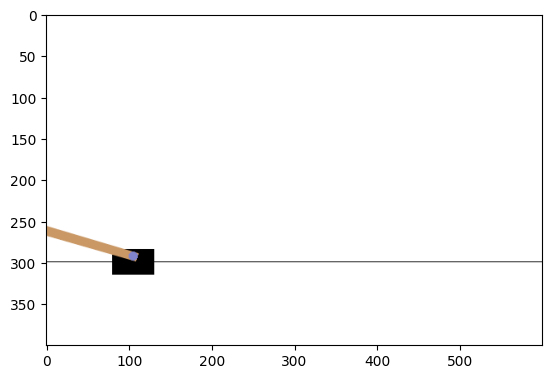

In [14]:
# pip install gymnasium[classic-control]
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython import display

%matplotlib inline

env = gym.make("CartPole-v1", render_mode="rgb_array")
env.reset()
img = plt.imshow(env.render())  # Just call this once.
for i in range(100):
    img.set_data(env.render())
    # plt.imshow(env.render())
    display.display(plt.gcf())
    display.clear_output(wait=True)
    env.step(env.action_space.sample())  # take a random action

env.close()
print("done")

In [15]:
from collections import namedtuple

Transition = namedtuple("Transition", ["state", "action", "reward"])

t = Transition("up", 1, 10)
t.state

'up'

In [16]:
transitions = [Transition("up", i, 10) for i in range(10)]
transitions

[Transition(state='up', action=0, reward=10),
 Transition(state='up', action=1, reward=10),
 Transition(state='up', action=2, reward=10),
 Transition(state='up', action=3, reward=10),
 Transition(state='up', action=4, reward=10),
 Transition(state='up', action=5, reward=10),
 Transition(state='up', action=6, reward=10),
 Transition(state='up', action=7, reward=10),
 Transition(state='up', action=8, reward=10),
 Transition(state='up', action=9, reward=10)]

In [17]:
batch = Transition(*zip(*transitions))
batch

Transition(state=('up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up'), action=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), reward=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10))

In [18]:
batch.state

('up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up', 'up')

In [19]:
batch.action

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [20]:
import numpy as np
import torch

In [21]:
n = np.random.rand(2, 3)
n, torch.from_numpy(n)

(array([[0.86834196, 0.71379203, 0.00695944],
        [0.03460631, 0.71754087, 0.01358655]]),
 tensor([[0.8683, 0.7138, 0.0070],
         [0.0346, 0.7175, 0.0136]], dtype=torch.float64))

## Torch Operations


### Torch Squeeze

`torch.squeeze` removes all dimension of 1 from the tensor.

In [22]:
import torch

t = torch.rand(1, 2, 1, 2)
t.shape

torch.Size([1, 2, 1, 2])

In [23]:
s = torch.squeeze(t)
s, s.shape

(tensor([[0.3566, 0.7225],
         [0.4224, 0.6005]]),
 torch.Size([2, 2]))

In [24]:
# Remove from first dimension
s = torch.squeeze(t, 0)
s, s.shape

(tensor([[[0.3566, 0.7225]],
 
         [[0.4224, 0.6005]]]),
 torch.Size([2, 1, 2]))

In [25]:
# Remove from second dimension (which is not 1, so it is not removed)
s = torch.squeeze(t, 1)
s, s.shape

(tensor([[[[0.3566, 0.7225]],
 
          [[0.4224, 0.6005]]]]),
 torch.Size([1, 2, 1, 2]))

In [26]:
# Remove from third dimension (which is not 1, so it is not removed)
s = torch.squeeze(t, 2)
s, s.shape

(tensor([[[0.3566, 0.7225],
          [0.4224, 0.6005]]]),
 torch.Size([1, 2, 2]))

In [27]:
# Remove from fourth dimension
s = torch.squeeze(t, 3)
s, s.shape

(tensor([[[[0.3566, 0.7225]],
 
          [[0.4224, 0.6005]]]]),
 torch.Size([1, 2, 1, 2]))

In [28]:
# Remove from third dimension
try:
    s = torch.squeeze(t, 4)
except IndexError as e:
    print(type(e), e)

<class 'IndexError'> Dimension out of range (expected to be in range of [-4, 3], but got 4)


### Torch Unsqueeze

The opposite of `torch.squeeze`, adds an additional dimension at the specified index. 
Can we use `torch.view` for this?

In [29]:
# (2, 3)
# Start with an array []
# There are two more arrays in it, [[], []]
# And each array has 3 cols, [[1,2,3], [4,5,6]]
t = torch.rand(2, 3)
t, t.shape

(tensor([[0.4083, 0.7886, 0.8799],
         [0.3980, 0.1163, 0.0064]]),
 torch.Size([2, 3]))

In [30]:
# unsqueeze(2,3, dim=0) = (1, 2, 3)
# Start with an array []
# Add a 1-dim array inside: [[]]
# There are two more arrays in it, [[[], []]]
# And each array has 3 cols, [[[1,2,3], [4,5,6]]]
s = torch.unsqueeze(t, 0)
s, s.shape

(tensor([[[0.4083, 0.7886, 0.8799],
          [0.3980, 0.1163, 0.0064]]]),
 torch.Size([1, 2, 3]))

In [31]:
# unsqueeze(2,3, dim=1) = (2, 1, 3)
# Start with an array []
# Add a 2-dim array inside: [[], []]
# Each has 1 array, [[[]], [[]]]
# And each array has 3 cols, [[[1,2,3]], [[1,2,3]]]
s = torch.unsqueeze(t, 1)
s, s.shape

(tensor([[[0.4083, 0.7886, 0.8799]],
 
         [[0.3980, 0.1163, 0.0064]]]),
 torch.Size([2, 1, 3]))

In [32]:
s[0][0]

tensor([0.4083, 0.7886, 0.8799])

In [33]:
t.view((2, 1, 3))

tensor([[[0.4083, 0.7886, 0.8799]],

        [[0.3980, 0.1163, 0.0064]]])

In [34]:
# unsqueeze(2,3, dim=2) = (2, 3, 1)
# Start with an array []
# Add a 2-dim array inside: [[], []]
# Each has 3 array, [[[], [], []], [[], [], []]]
# And each array has 1 col, [[[1], [2], [3]], [[4], [5], [6]]]
s = torch.unsqueeze(t, 2)  # same as dim=-1
s, s.shape

(tensor([[[0.4083],
          [0.7886],
          [0.8799]],
 
         [[0.3980],
          [0.1163],
          [0.0064]]]),
 torch.Size([2, 3, 1]))

In [35]:
s[0][0]

tensor([0.4083])

In [36]:
t.view((2, 3, 1))

tensor([[[0.4083],
         [0.7886],
         [0.8799]],

        [[0.3980],
         [0.1163],
         [0.0064]]])


### Torch Stack

`torch.stack` operation is basically `torch.unsqueeze` followed by `torch.cat` at the given dimension.

In [37]:
import torch

t = torch.rand((2, 3))
t, t.shape

(tensor([[0.3298, 0.9315, 0.1492],
         [0.1927, 0.8380, 0.2639]]),
 torch.Size([2, 3]))

In [38]:
t = torch.Tensor([[1, 2, 3], [4, 5, 6]])
t, t.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 torch.Size([2, 3]))

In [39]:
t[0], t[1]

(tensor([1., 2., 3.]), tensor([4., 5., 6.]))

In [40]:
# (2, 3) + (2, 3)
# unsqueeze(2, 3, dim=0) = (1, 2, 3)
# cat((1,2,3), (1,2,3), dim=0) = (2, 2, 6)
a = torch.stack((t, t))
a, a.shape

(tensor([[[1., 2., 3.],
          [4., 5., 6.]],
 
         [[1., 2., 3.],
          [4., 5., 6.]]]),
 torch.Size([2, 2, 3]))

In [41]:
# unsqueeze(2, 3, dim=1) = (2, 1, 3)
# cat((2,1,3), (2,1,3), dim=1) = (2, 2, 6)
b = torch.stack((t, t), dim=1)
b, b.shape

(tensor([[[1., 2., 3.],
          [1., 2., 3.]],
 
         [[4., 5., 6.],
          [4., 5., 6.]]]),
 torch.Size([2, 2, 3]))

In [42]:
# unsqueeze(2, 3, dim=2) = (2, 3, 1)
# cat((2,3,1), (2,3,1), dim=1) = (2, 3, 2)
c = torch.stack((t, t), dim=2)
c, c.shape

(tensor([[[1., 1.],
          [2., 2.],
          [3., 3.]],
 
         [[4., 4.],
          [5., 5.],
          [6., 6.]]]),
 torch.Size([2, 3, 2]))

In [43]:
print(a[0])
print(a[1])

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [44]:
print(b[0])
print(b[1])

tensor([[1., 2., 3.],
        [1., 2., 3.]])
tensor([[4., 5., 6.],
        [4., 5., 6.]])


In [45]:
a = torch.stack((t, t, t))
b = torch.stack((t, t, t), dim=1)
c = torch.stack((t, t, t), dim=2)
print(a, a.shape)
print(b, b.shape)
print(c, c.shape)

tensor([[[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]],

        [[1., 2., 3.],
         [4., 5., 6.]]]) torch.Size([3, 2, 3])
tensor([[[1., 2., 3.],
         [1., 2., 3.],
         [1., 2., 3.]],

        [[4., 5., 6.],
         [4., 5., 6.],
         [4., 5., 6.]]]) torch.Size([2, 3, 3])
tensor([[[1., 1., 1.],
         [2., 2., 2.],
         [3., 3., 3.]],

        [[4., 4., 4.],
         [5., 5., 5.],
         [6., 6., 6.]]]) torch.Size([2, 3, 3])


### Torch Cat

In [46]:
a = torch.cat((t, t))  # (2,3), (2,3) = (4,3), adds the 0 dim
b = torch.cat((t, t), dim=1)  # (2, 3), (2,3) = (2, 6), adds the 1 dim
print(a, a.shape)
print(b, b.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.]]) torch.Size([4, 3])
tensor([[1., 2., 3., 1., 2., 3.],
        [4., 5., 6., 4., 5., 6.]]) torch.Size([2, 6])


In [47]:
a = torch.cat((t, t, t))
b = torch.cat((t, t, t), dim=1)
print(a, a.shape)
print(b, b.shape)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.],
        [1., 2., 3.],
        [4., 5., 6.]]) torch.Size([6, 3])
tensor([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
        [4., 5., 6., 4., 5., 6., 4., 5., 6.]]) torch.Size([2, 9])


### Torch Gather

The output is actually quite simple. It follows the size of the `index` tensor.

For each dimension, just replace the dim of the `index` tensor:

- dim 0: `input[index][j][k]`
- dim 1: `input[i][index][k]`
- dim 2: `input[i][j][index]`

In [48]:
t = torch.Tensor([[1, 2, 3], [4, 5, 6]])
t, t.shape

(tensor([[1., 2., 3.],
         [4., 5., 6.]]),
 torch.Size([2, 3]))

In [49]:
# We have three rows to gather
# Take for example the first index row: [0, 1, 1]
# Each position is (0, 0), (0, 1), (0, 2)
# Replace each value at 0 with the index value [0, 1, 1]
# Each position is now (0, 0), (1, 1), (1, 2)
# Take the input value
#
# The max number of rows for index is unlimited, but the max number of cols must match the input col, which is 3.
# If tensor shape is (2, 3)
# Then index shape can be (n, 3) for dim 0
index = torch.Tensor([[0, 1, 1], [1, 1, 0], [1, 0, 0], [0, 0, 0]]).long()
print(index.shape)
torch.gather(t, 0, index)

torch.Size([4, 3])


tensor([[1., 5., 6.],
        [4., 5., 3.],
        [4., 2., 3.],
        [1., 2., 3.]])

In [50]:
# We have two rows to gather
# Take for example the first index row: [1, 2, 0, 1]
# Each position is (0, 0), (0, 1), (0, 2), (0, 3)
# Replace each value at 1 with the index value [1, 2, 0, 1]
# Each position is now (0, 1), (0, 2), (0, 0), (0, 1)
# Take the input value
#
# The max number of row is limited to the number of rows, but the max number of cols is unlimited.
# If tensor shape is (2, 3)
# Then index shape can be (2, n) for dim 1
index = torch.Tensor([[1, 2, 0, 1], [0, 1, 2, 1]]).long()
print(index.shape)
torch.gather(t, 1, index)

torch.Size([2, 4])


tensor([[2., 3., 1., 2.],
        [4., 5., 6., 5.]])

In [51]:
import random

random.randint(0, 1)  # Generates between lo (inclusive) and hi (inclusive)

1

In [52]:
np.random.randint(0, 1)  # Generates between lo (inclusive) and hi (exclusive)

0

## One Hot Encode

In [53]:
import torch
import torch.nn.functional as F

t = torch.arange(0, 6)

print(t)
F.one_hot(t)

tensor([0, 1, 2, 3, 4, 5])


tensor([[1, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 1]])

In [54]:
F.one_hot(t, num_classes=10)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

In [55]:
F.one_hot(torch.tensor(0), num_classes=3)

tensor([1, 0, 0])

In [56]:
F.one_hot(torch.tensor(1), num_classes=3)

tensor([0, 1, 0])

In [57]:
F.one_hot(torch.tensor(2), num_classes=3)

tensor([0, 0, 1])

In [58]:
# RuntimeError: Class values must be smaller than num_classes.
# F.one_hot(torch.tensor(3), num_classes=3)

In [59]:
t.view((3, 2))

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [60]:
t.view((2, 3))

tensor([[0, 1, 2],
        [3, 4, 5]])

In [61]:
t.view((1, 2, 3))

tensor([[[0, 1, 2],
         [3, 4, 5]]])

In [62]:
t.view((3, 2, 1))

tensor([[[0],
         [1]],

        [[2],
         [3]],

        [[4],
         [5]]])

## Single value

In [63]:
a_list = torch.Tensor([1])
an_item = torch.tensor(1)
print(a_list)
print(an_item)

tensor([1.])
tensor(1)


In [64]:
a_list.item(), an_item.item()

(1.0, 1)

In [65]:
detached = a_list.detach()
detached

tensor([1.])

In [66]:
detached[0] = 2

In [67]:
detached

tensor([2.])